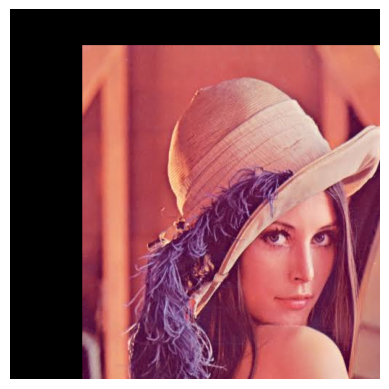

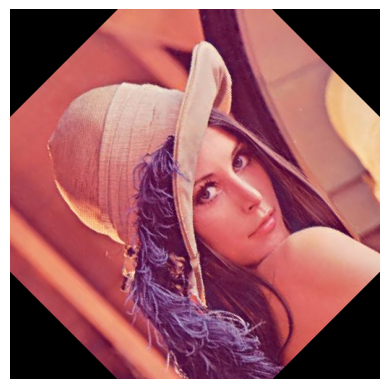

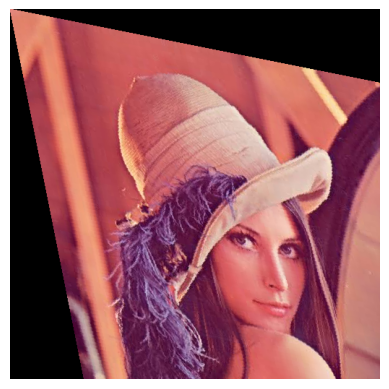

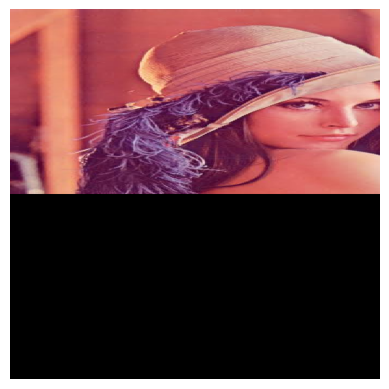

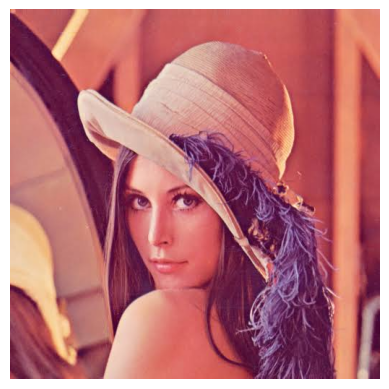

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


def load_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
    return image


def transform_point(x, y, transformation_matrix):
    point = np.array([x, y, 1])  
    new_point = np.dot(transformation_matrix, point)
    return int(new_point[0]), int(new_point[1])

def apply_transformation(image, transformation_matrix):
    h, w, c = image.shape
    transformed_image = np.zeros_like(image)
    inv_matrix = np.linalg.inv(transformation_matrix)
    for i in range(h):
        for j in range(w):
            orig_x, orig_y = transform_point(j, i, inv_matrix)
         
            if 0 <= orig_x < w and 0 <= orig_y < h:
                transformed_image[i, j] = image[orig_y, orig_x]
    
    return transformed_image


def get_translation_matrix(tx, ty):
    return np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])


def get_rotation_matrix(theta, cx, cy):
    rad = np.radians(theta)
    cos_t, sin_t = np.cos(rad), np.sin(rad)
    return np.array([
        [cos_t, -sin_t, cx - cos_t * cx + sin_t * cy],
        [sin_t, cos_t, cy - sin_t * cx - cos_t * cy],
        [0, 0, 1]
    ])


def get_shearing_matrix(shx, shy):
    return np.array([
        [1, shx, 0],
        [shy, 1, 0],
        [0, 0, 1]
     ])   


def reflect_image(image, axis):
   
    if axis == 'x':
        
        reflected_image = np.flipud(image) 
    elif axis == 'y':
       
        reflected_image = np.fliplr(image)  
    else:
        raise ValueError("Axis must be 'x' or 'y'")

    return reflected_image



def get_scaling_matrix(sx, sy):
    return np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])


def display_image(image_array):
    plt.imshow(image_array)
    plt.axis('off')
    plt.show()


def perform_transformations(image_path):
    image = load_image(image_path)

    
    translation_matrix = get_translation_matrix(100, 50)
    translated_image = apply_transformation(image, translation_matrix)
    display_image(translated_image)

    
    height, width, _ = image.shape
    rotation_matrix = get_rotation_matrix(-45, width // 2, height // 2)
    rotated_image = apply_transformation(image, rotation_matrix)
    display_image(rotated_image)

    
    shearing_matrix = get_shearing_matrix(0.2,0.2)
    sheared_image = apply_transformation(image, shearing_matrix)
    display_image(sheared_image)

    
    scaling_matrix = get_scaling_matrix(1.5,0.5)
    scaled_image = apply_transformation(image, scaling_matrix)
    display_image(scaled_image)

    
    reflection_image = reflect_image(image,'y')
    display_image(reflection_image)


image_path = r"D:\XKUT9.png"  


perform_transformations(image_path)


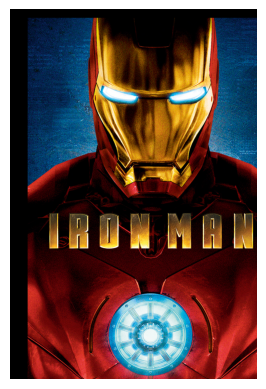

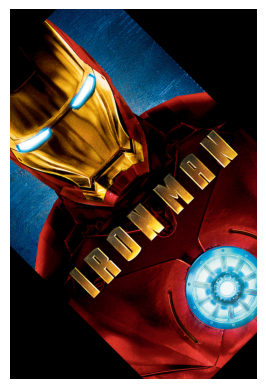

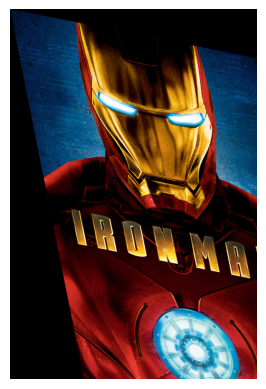

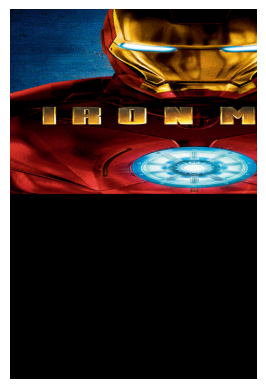

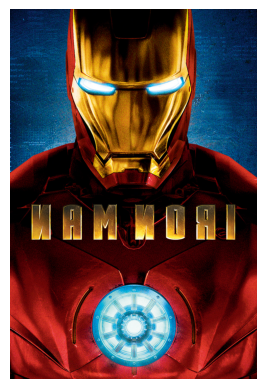

In [2]:
image_path = r"D:\rYy4MShKrZVXhiG4BLqwW1PeSOT.jpg"  


perform_transformations(image_path)